# Predicting Football Player Value based on their FIFA 23 ratings

## Introduction
FIFA 23 is a football simulation video game published by Electronic Arts. It is the 30th and final installment in the FIFA series that is developed by EA Sports, and released worldwide on 30 September 2022 for PC, Nintendo Switch, PlayStation 4, PlayStation 5, Xbox One, Xbox Series X/S and Google Stadia.

The goal of this project is to predict a player's value based on their attributes and in -game ratings.

## Dataset 
The data is collected from [Kaggle](https://www.kaggle.com/datasets/sanjeetsinghnaik/fifa-23-players-dataset): *Fifa 23 Players Dataset*

There are 17530 records in the dataset, and the data is described by 89 attributes. It contains the information regarding each player in the game including their personal information, physical attributes, ratings, and the value. The goal of this dataset is to predict a player's value based on its game ratings.

### Import standard Python libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading and loading the data into a Dataframe object
The first step is to call the .csv file on my Google Drive then mount the Drive folder to the notebook.

In [2]:
import pandas as pd

df = pd.read_csv("Fifa 23 Players Data.csv")

df = pd.DataFrame(df)

# To ensure the read is valid, I will print the first 5 data 
pd.set_option('display.max_columns', None)
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21


In [3]:
df.shape

(18539, 89)

### Cleaning the Dataframe
In this step, we will ensure that all data in the dataset are valid, meaning there are no null values and no duplicate entries.

In [4]:
df = df.dropna()

In [5]:
df = df.drop_duplicates()

# After removing the duplicate entries, we are left with 18420 players.
df

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,174,68,1287,274,Sligo Rovers,500,193000,RES,2022,20,2018,-,Right,3,2,1,-,-,-,-,Medium,Medium,68,48,43,51,31,33,40,49,30,42,48,50,53,50,33,48,69,68,59,44,63,50,45,32,31,46,37,22,50,52,40,47,39,29,27,6,9,5,13,8,49,50,50,50,50,50,51,50,44,50,41,38,41,40,36,40

In [6]:
df.dtypes

Known As          object
Full Name         object
Overall            int64
Potential          int64
Value(in Euro)     int64
                   ...  
RWB Rating         int64
LB Rating          int64
CB Rating          int64
RB Rating          int64
GK Rating          int64
Length: 89, dtype: object

### Data Processing
In this step, we will remove irrelevant columns that can't be used to determine a player's value, such as the nickname, image url, other positions player, release clause value, club position,  .

In [7]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()

In [8]:
df.columns

Index(['known_as', 'full_name', 'overall', 'potential', 'value(in_euro)',
       'positions_played', 'best_position', 'nationality', 'image_link', 'age',
       'height(in_cm)', 'weight(in_kg)', 'totalstats', 'basestats',
       'club_name', 'wage(in_euro)', 'release_clause', 'club_position',
       'contract_until', 'club_jersey_number', 'joined_on', 'on_loan',
       'preferred_foot', 'weak_foot_rating', 'skill_moves',
       'international_reputation', 'national_team_name',
       'national_team_image_link', 'national_team_position',
       'national_team_jersey_number', 'attacking_work_rate',
       'defensive_work_rate', 'pace_total', 'shooting_total', 'passing_total',
       'dribbling_total', 'defending_total', 'physicality_total', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'longpassing', 'ballcontrol',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'shot_powe

In [9]:
# Dropping irrelevant columns
df.drop(['known_as', 'positions_played', 'image_link', 'release_clause', 'club_position',
       'contract_until', 'club_jersey_number', 'joined_on', 'on_loan', 'international_reputation', 
       'national_team_name', 'national_team_image_link', 'national_team_position','national_team_jersey_number', 
       'st_rating', 'lw_rating', 'lf_rating', 'cf_rating', 'rf_rating', 'rw_rating','cam_rating', 'lm_rating', 
       'cm_rating', 'rm_rating', 'lwb_rating', 'cdm_rating', 'rwb_rating', 'lb_rating', 'cb_rating', 'rb_rating',
       'gk_rating'], axis = 1, inplace = True)
df

,full_name,overall,potential,value(in_euro),best_position,nationality,age,height(in_cm),weight(in_kg),totalstats,basestats,club_name,wage(in_euro),preferred_foot,weak_foot_rating,skill_moves,attacking_work_rate,defensive_work_rate,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,longpassing,ballcontrol,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,goalkeeper_diving,goalkeeper_handling,_goalkeeperkicking,goalkeeper_positioning,goalkeeper_reflexes
0,Lionel Messi,91,91,54000000,CAM,Argentina,35,169,67,2190,452,Paris Saint-Germain,195000,Left,4,4,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8
1,Karim Benzema,91,91,64000000,CF,France,34,185,81,2147,455,Real Madrid CF,450000,Right,4,4,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7
2,Robert Lewandowski,91,91,84000000,ST,Poland,33,185,81,2205,458,FC Barcelona,420000,Right,4,4,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10
3,Kevin De Bruyne,91,91,107500000,CM,Belgium,31,181,70,2303,483,Manchester City,350000,Right,5,4,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13
4,Kylian Mbappé,91,95,190500000,ST,France,23,182,73,2177,470,Paris Saint-Germain,230000,Right,4,5,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,Darren Collins,47,56,110000,CAM,Republic of Ireland,21,174,68,1287,274,Sligo Rovers,500,Right,3,2,Medium,Medium,68,48,43,51,31,33,40,49,30,42,48,50,53,50,33,48,69,68,59,44,63,50,45,32,31,46,37,22,50,52,40,47,39,29,27,6,9,5,13,8
18535,Dejiang Yang,47,57,90000,CDM,China PR,17,175,60,1289,267,Guangzhou FC,500,Right,3,2,Medium,Medium,55,37,41,47,48,39,34,33,44,46,31,42,32,31,45,46,52,57,59,51,80,50,55,34,35,35,52,46,35,40,33,45,46,50,52,6,12,11,8,6
18536,Liam Mullan,47,67,130000,RM,Northern Ireland,18,170,65,1333,277,Derry City,500,Right,3,2,High,Medium,64,40,49,52,37,35,41,36,42,54,37,52,47,42,52,50,70,59,46,49,73,54,54,36,31,36,39,24,42,50,43,59,39,37,48,11,12,8,7,12
18537,Daithí McCallion,47,61,100000,CB,Republic of Ireland,17,178,65,1113,226,Derry City,500,Right,3,2,Medium,Medium,52,24,25,32,52,41,21,20,41,25,27,27,26,20,22,26,53,51,42,43,66,34,72,49,34,18,42,54,23,32,37,41,50,54,54,8,14,13,7,8


In [10]:
df.nunique()

full_name                 18337
overall                      45
potential                    48
value(in_euro)              257
best_position                15
nationality                 160
age                          28
height(in_cm)                49
weight(in_kg)                54
totalstats                 1411
basestats                   248
club_name                   679
wage(in_euro)               133
preferred_foot                2
weak_foot_rating              5
skill_moves                   5
attacking_work_rate           3
defensive_work_rate           3
pace_total                   70
shooting_total               75
passing_total                68
dribbling_total              67
defending_total              76
physicality_total            62
crossing                     88
finishing                    92
heading_accuracy             88
short_passing                84
volleys                      88
dribbling                    92
curve                        88
freekick

In [11]:
# Add a new column that classifies a player's position (Defender, Midfielder, or Forward)

defender = ['GK', 'CB', 'LB', 'RB', 'LWB', 'RWB']
midfielder = ['CM', 'LM', 'RM', 'CDM', 'CAM']
forward = ['ST', 'LW', 'RW', 'CF']

pos_pos = {'DEFENDER': defender, 'MIDFIELDER': midfielder, 'FORWARD': forward}

for x in pos_pos:
    df.loc[df['best_position'].isin(pos_pos[x]),'position'] = x


df[['full_name','best_position','position']].sample(8)

,full_name,best_position,position
2409,Leonardo Luis Sandelas Junior,CDM,MIDFIELDER
8100,Erhun Öztümer,LW,FORWARD
15639,Rahul Bheke,CB,DEFENDER
17172,Abdulmalek Al Ayeri,RWB,DEFENDER
232,Ferran Torres García,LW,FORWARD
10476,Esteban Valencia,CAM,MIDFIELDER
3663,Patric Pfeiffer,CB,DEFENDER
12300,Pablo Tomeo Félez,CB,DEFENDER


## Data Visualization

In [12]:
# Create a new DataFrame that contains sorted values based on the Position, and its value
df_mapping = pd.DataFrame({
    'pos': ['GK', 'CB', 'LB', 'RB', 'LWB', 'RWB', 'CM', 'LM', 'RM', 'CDM', 'CAM','ST', 'LW', 'RW', 'CF']})
sort_mapping = df_mapping.reset_index().set_index('pos')
df['best_position_index'] = df['best_position'].map(sort_mapping['index'])
sorted_df = df.sort_values(['best_position_index', 'value(in_euro)'])
sorted_df.head()

,full_name,overall,potential,value(in_euro),best_position,nationality,age,height(in_cm),weight(in_kg),totalstats,basestats,club_name,wage(in_euro),preferred_foot,weak_foot_rating,skill_moves,attacking_work_rate,defensive_work_rate,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,longpassing,ballcontrol,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,goalkeeper_diving,goalkeeper_handling,_goalkeeperkicking,goalkeeper_positioning,goalkeeper_reflexes,position,best_position_index
438,Tomáš Vaclík,80,80,0,GK,Czech Republic,33,188,85,1309,432,Free agent,0,Right,3,1,Medium,Medium,78,75,74,83,40,82,15,14,19,28,13,14,17,16,45,20,42,37,47,78,56,56,72,38,71,16,29,23,15,67,13,63,20,18,18,78,75,74,82,83,DEFENDER,0
447,Guillermo Ochoa,80,80,0,GK,Mexico,36,185,78,1265,440,Free agent,0,Right,3,1,Medium,Medium,82,73,70,84,50,81,15,12,19,37,16,10,14,17,37,20,50,50,57,70,43,53,79,38,60,11,19,23,16,50,16,60,21,10,12,82,73,70,81,84,DEFENDER,0
548,Alfredo Talavera,79,79,0,GK,Mexico,39,186,85,1345,446,Free agent,0,Right,4,1,Medium,Medium,80,82,68,80,58,78,15,13,14,35,13,10,15,14,35,21,58,58,57,70,47,51,77,36,82,13,38,24,14,50,44,60,26,13,14,80,82,68,78,80,DEFENDER,0
865,Milan Borjan,77,77,0,GK,Canada,34,196,84,1360,423,Free agent,0,Right,2,1,Medium,Medium,78,74,75,78,44,74,15,15,24,38,19,28,16,16,48,23,47,40,40,73,46,56,68,40,79,12,44,24,14,57,34,60,21,23,21,78,74,75,74,78,DEFENDER,0
1232,Florin Niță,76,76,0,GK,Romania,34,184,78,1081,403,Free agent,0,Right,2,1,Medium,Medium,76,76,69,78,27,77,14,8,13,23,5,18,10,13,22,11,25,31,28,64,64,52,61,36,79,5,20,8,4,39,11,62,14,13,14,76,76,69,77,78,DEFENDER,0


In [13]:
# Show the highest value player for each position
df.sort_values(by='value(in_euro)', ascending=False).groupby('best_position')[['full_name', 'best_position', 'value(in_euro)']].head(1)

,full_name,best_position,value(in_euro)
4,Kylian Mbappé,ST,190500000
42,Frenkie de Jong,CM,116500000
5,Mohamed Salah,RW,115500000
83,Phil Foden,CAM,109500000
63,Vinícius José de Oliveira Júnior,LW,109000000
20,Rúben Santos Gato Alves Dias,CB,107500000
17,Joshua Kimmich,CDM,105500000
22,Gianluigi Donnarumma,GK,103500000
15,Sadio Mané,LM,99500000
24,João Pedro Cavaco Cancelo,LB,82500000


In [14]:
stats_cols=['pace_total', 'shooting_total', 'passing_total',
       'dribbling_total', 'defending_total', 'physicality_total', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'longpassing', 'ballcontrol',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
       'goalkeeper_diving', 'goalkeeper_handling', '_goalkeeperkicking',
       'goalkeeper_positioning', 'goalkeeper_reflexes']
print('BEST IN DIFFERENT ASPECTS (Player Name, Overall):')
print('_________________________________________________\n')

for x in stats_cols:
    print('Best {0} : {1}, {2}'.format(x, df.loc[df[x].idxmax()][0], df.loc[df[x].idxmax()][1]))


BEST IN DIFFERENT ASPECTS (Player Name, Overall):
_________________________________________________

Best pace_total : Kylian Mbappé, 91
Best shooting_total : C. Ronaldo dos Santos Aveiro, 90
Best passing_total : Kevin De Bruyne, 91
Best dribbling_total : Lionel Messi, 91
Best defending_total : Virgil van Dijk, 90
Best physicality_total : Manuel Neuer, 90
Best crossing : Kevin De Bruyne, 91
Best finishing : Robert Lewandowski, 91
Best heading_accuracy : Luuk de Jong, 79
Best short_passing : Kevin De Bruyne, 91
Best volleys : Lautaro Martínez, 86
Best dribbling : Lionel Messi, 91
Best curve : Lionel Messi, 91
Best freekick_accuracy : James Ward-Prowse, 81
Best longpassing : Kevin De Bruyne, 91
Best ballcontrol : Neymar da Silva Santos Jr., 89
Best acceleration : Kylian Mbappé, 91
Best sprint_speed : Kylian Mbappé, 91
Best agility : Bernardo Mota Carvalho e Silva, 88
Best reactions : C. Ronaldo dos Santos Aveiro, 90
Best balance : Lionel Messi, 91
Best shot_power : Erling Haaland, 88
Bes

In [15]:
# Number of countries available and top 5 countries with highest number of players
print('Total number of countries : {0}'.format(df['nationality'].nunique()))
print(df['nationality'].value_counts().head(5))

Total number of countries : 160
England      1624
Germany      1201
Spain        1062
France        953
Argentina     931
Name: nationality, dtype: int64


In [16]:
# Clubs with the highest total value
print('Top 5 clubs with the highest total player value:')
df.groupby('club_name')['value(in_euro)'].sum().nlargest(5)


Top 5 clubs with the highest total player value:


club_name
Manchester City        1248655000
Liverpool              1098825000
Paris Saint-Germain    1051375000
Real Madrid CF         1024625000
FC Barcelona           1013125000
Name: value(in_euro), dtype: int64

In [17]:
print('Distribution of top 100 players overall:')
print(df['overall'].head(100).value_counts().sort_index(ascending = False))

Distribution of top 100 players overall:
91     5
90     5
89    10
88    10
87    13
86    22
85    26
84     9
Name: overall, dtype: int64


Text(0, 0.5, 'Total Player')

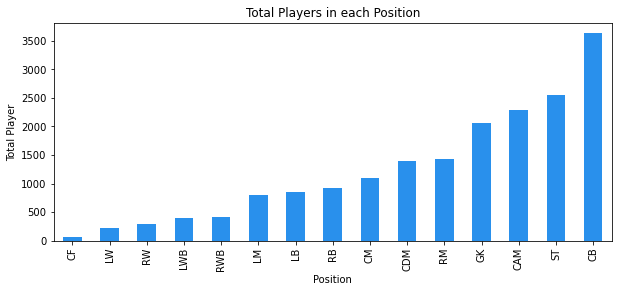

In [18]:
# Create a bar chart for every position sorted by the count
plt.figure(figsize=(10,4))
df.groupby('best_position').size().sort_values().plot(kind='bar', color='#2990ec')
plt.title('Total Players in each Position')
plt.xlabel('Position')
plt.ylabel('Total Player')

Text(0, 0.5, 'Total Player')

<Figure size 720x288 with 0 Axes>

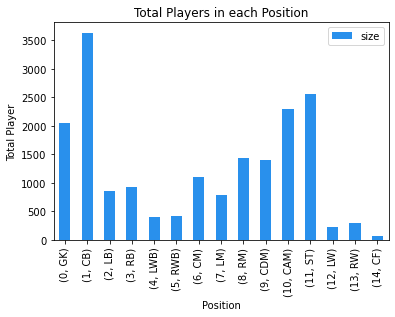

In [19]:
test1 = df.groupby(['best_position_index', 'best_position']).size().to_frame('size')

test1.sort_values(by = 'best_position_index', ascending = False).reset_index()

plt.figure(figsize=(10,4))
test1.plot(kind='bar', color='#2990ec')
plt.title('Total Players in each Position')
plt.xlabel('Position')
plt.ylabel('Total Player')


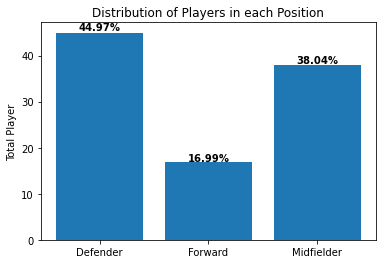

In [20]:
total_players = df['position'].count()

position_count_df = df.groupby(['position']).size().to_frame('size')
position_count_df.sort_values(by = 'position', ascending = False).reset_index()

# compute percentage of each format
percentage = []
 
for i in range(position_count_df.shape[0]):
    pct = (position_count_df.iloc[i]['size'] / total_players) * 100
    percentage.append(round(pct, 2))

position_count_df['Percentage'] = percentage

 
# depict illustration
plt.figure(figsize=(6, 4))
colors_list = ['Red','Orange', 'Blue', 'Purple']
graph = plt.bar(['Defender', 'Forward', 'Midfielder'], position_count_df['Percentage'])

 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(position_count_df.iloc[i]['Percentage'])+'%',
             ha='center',
             weight='bold')
    i+=1
    
plt.title('Distribution of Players in each Position')
plt.ylabel('Total Player')
plt.show()

In [21]:
pd.set_option('display.max_columns', None)
df.head()

,full_name,overall,potential,value(in_euro),best_position,nationality,age,height(in_cm),weight(in_kg),totalstats,basestats,club_name,wage(in_euro),preferred_foot,weak_foot_rating,skill_moves,attacking_work_rate,defensive_work_rate,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,longpassing,ballcontrol,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,goalkeeper_diving,goalkeeper_handling,_goalkeeperkicking,goalkeeper_positioning,goalkeeper_reflexes,position,best_position_index
0,Lionel Messi,91,91,54000000,CAM,Argentina,35,169,67,2190,452,Paris Saint-Germain,195000,Left,4,4,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,MIDFIELDER,10
1,Karim Benzema,91,91,64000000,CF,France,34,185,81,2147,455,Real Madrid CF,450000,Right,4,4,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,FORWARD,14
2,Robert Lewandowski,91,91,84000000,ST,Poland,33,185,81,2205,458,FC Barcelona,420000,Right,4,4,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,FORWARD,11
3,Kevin De Bruyne,91,91,107500000,CM,Belgium,31,181,70,2303,483,Manchester City,350000,Right,5,4,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,MIDFIELDER,6
4,Kylian Mbappé,91,95,190500000,ST,France,23,182,73,2177,470,Paris Saint-Germain,230000,Right,4,5,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,FORWARD,11


## Multivariate Linear Regression

We now build a mutivariate linear regression model to predict the value of a player, using all the relevant features in the dataset.

### Prepare Data

First we prepare the data by extracting the players' information relevant for predicting their values.

#### Create a pandas DataFrame consisting of the features relevant for predicting the house price.

In [22]:
df.columns

Index(['full_name', 'overall', 'potential', 'value(in_euro)', 'best_position',
       'nationality', 'age', 'height(in_cm)', 'weight(in_kg)', 'totalstats',
       'basestats', 'club_name', 'wage(in_euro)', 'preferred_foot',
       'weak_foot_rating', 'skill_moves', 'attacking_work_rate',
       'defensive_work_rate', 'pace_total', 'shooting_total', 'passing_total',
       'dribbling_total', 'defending_total', 'physicality_total', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'longpassing', 'ballcontrol',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
       'goalkeeper_diving', 'goalkeeper_handling', '_goalkeeperkicking',
       'goalkeeper_positioning', 'goalkeeper_r

In [23]:
X = df.drop(columns=['full_name', 'value(in_euro)', 'best_position', 'nationality', 'age', 'club_name', 'preferred_foot',
       'attacking_work_rate', 'defensive_work_rate',  'position'])
y = df['value(in_euro)']

#### Split the data set into a training set (80%) and a test set (20%)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)

X_train.shape =  (14736, 50)
y_train.shape =  (14736,)
X_test.shape =  (3684, 50)
y_test.shape =  (3684,)


### Train the Model

Now that the data is prepared, we are ready to train the model.

#### Create a LinearRegression model object

In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

#### Fit the model to the training set

As noted above, both **X_train** which contains the input features and **y_train** which contains the price of every training example are used for training the model. This is an example of **Supervised Learning**.

In [27]:
lr.fit(X_train, y_train)

LinearRegression()

#### Parameters of the Model

We can find the parameters of the model by its **coef_** and **intercept_** attributes. In a plane, a line described by an equation of the form

\begin{equation}
y = ax + b
\end{equation}

The coefficient (slope) $a$ is given by the **coef_** attribute, and the intercept $b$ by the **intercept_** attribute. Therefore, the univariate linear model predicts the price of a house as

\begin{equation}
\text{predicted price} \; = \; \text{coef_} \: \times \: \text{sqft_living} \: + \: \text{intercept_} 
\end{equation}

In [28]:
lr.coef_

array([ 53219.24684617, 178393.39188306,  -1507.04286332,    775.59152654,
        -1405.15539236,   -506.20499007,    300.22317451,  47022.09287794,
        82441.88547391,  18775.36988859,  76097.50267399,  44819.51302387,
       -53120.46342385, -44692.89974501, -42385.22740841, -27537.96097966,
        -2433.33662994,  -9613.00678582, -15564.8913752 ,   3995.99437463,
         6700.95623133,  -4585.57771273,   1690.05272479,   9518.14218211,
       -11897.39862495,  11347.41373943,   9123.24719519,  -4426.37450101,
        27006.25612034,  13392.00448523, -41098.08663428,  -7462.53955947,
        35234.21889743,  33882.55856152,  -8931.47103586,    549.51442009,
         2116.53239995,  -5285.6534168 ,   8964.57338702, -23299.65953294,
        -5755.794467  ,  13465.44190765,  25979.03388509,   -904.60056669,
       -17764.84801934, -16310.28405887,  -9676.95613518, -14245.25576877,
        16666.80543382, -21797.1535966 ])

In [29]:
lr.intercept_

-15195970.208075555

#### Make a prediction

Now that the model is trained, we can use it to make a prediction. The input to the method **predict** is a pandas DataFrame or a two-dimensional NumPy array, where each row consists of the input features of a single house. The output is a one-dimensional NumPy array consisting of the prices of the houses. 

In [30]:
X_sample = X_train.iloc[:5]
X_sample

,overall,potential,height(in_cm),weight(in_kg),totalstats,basestats,wage(in_euro),weak_foot_rating,skill_moves,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,longpassing,ballcontrol,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,goalkeeper_diving,goalkeeper_handling,_goalkeeperkicking,goalkeeper_positioning,goalkeeper_reflexes,best_position_index
7327,67,68,178,71,1768,375,500,3,3,75,68,56,66,38,72,55,69,64,58,61,65,64,59,47,65,73,77,71,67,76,70,84,81,71,66,58,29,68,55,63,68,42,35,27,14,8,10,9,7,11
12806,63,63,188,86,1572,344,2000,2,2,76,38,47,56,61,66,48,25,58,55,39,53,28,35,52,54,76,76,70,58,69,67,78,33,83,39,62,59,36,38,36,46,61,62,62,14,16,11,8,11,1
14859,60,62,172,66,1598,339,500,3,3,69,50,55,65,47,53,55,50,41,57,51,64,55,51,49,60,68,69,82,50,81,54,54,67,50,46,44,46,53,56,53,60,52,47,41,9,10,13,6,14,8
15616,59,65,178,76,1554,337,2000,3,2,62,46,57,60,51,61,38,38,45,66,33,58,42,42,63,63,61,63,74,60,58,61,55,65,61,56,55,57,34,61,43,43,53,47,52,15,7,14,6,8,6
12107,63,63,164,60,1551,331,1000,4,4,86,56,54,69,24,42,51,55,31,58,60,66,64,46,45,64,90,82,90,60,92,60,60,62,31,55,41,23,54,57,49,60,25,20,27,6,6,7,6,8,8
242,82,85,180,77,2106,445,110000,3,3,76,60,78,78,78,75,84,58,69,80,65,79,71,67,74,81,77,75,69,81,72,74,86,86,69,47,73,76,78,75,52,75,78,80,82,10,7,14,7,10,4
7474,67,67,180,70,1650,357,6000,4,4,84,63,61,68,28,53,62,64,37,63,61,65,62,55,56,66,85,84,85,60,78,66,49,75,50,63,36,21,62,63,52,62,30,27,26,12,10,8,11,6,12
543,79,83,185,73,1694,377,51000,2,2,82,32,45,58,81,79,34,27,75,63,29,40,32,35,40,73,85,80,69,84,62,45,69,83,77,25,80,84,32,34,46,69,80,80,84,12,7,10,6,12,1
15656,59,66,176,69,1490,324,5000,3,3,78,49,58,63,33,43,57,51,26,61,41,62,44,54,60,59,76,79,76,50,87,49,33,55,38,48,45,33,54,59,41,57,34,35,27,13,14,8,13,8,7
7407,67,67,191,84,1176,377,500,2,1,63,68,69,65,42,70,11,10,13,24,13,11,24,39,26,19,41,43,37,61,37,52,75,32,77,14,31,20,15,52,23,65,14,14,13,63,68,69,70,65,0


In [31]:
lr.predict(X_sample)

array([ 2.48350611e+05, -1.87942979e+06, -1.29480490e+06, -4.66931406e+05,
        1.34820380e+05,  3.60775126e+07,  2.71495411e+06,  1.87092211e+07,
        1.68657756e+06,  3.11004799e+04])

In [32]:
y_train.iloc[:5].values

array([ 1200000,   400000,   300000,   350000,   500000, 37000000,
        1100000, 22500000,   450000,   110000], dtype=int64)

#### Use the trained model to predict the prices of houses in the training set

In [33]:
y_train_pred = lr.predict(X_train)

#### Compute the $R^2$-score of the model on the training set 

The $R^2$-score, also known as the coefficient of determination, is a measure of the performance of a regression model. Its best possible value is 1.

In [34]:
from sklearn.metrics import r2_score

r2_score(y_train, y_train_pred)

0.7120746262066383

#### Compare predicted values and true values

While it's hard to plot and visualize the result of a high dimensional model, we use the following DataFrame to compare the values predicted by the model against the true values.

### Remark

While getting a 0.71 of $R^2$-score out of 1.00 does not sound very bad, we believe that the result still indicates that **underfitting** still occurs and calls for an even better model. The underfitting is likely due to the nonlinear nature of the data; in this case, no linear model would fit the data well.

## Random Forest

We now employ a more sophisticated regression model known as **Random Forest** to achieve significantly better player value predictions than the above multivariable linear model. 

### Import the RandomForestRegressor class from sklearn.ensemble 

In [ ]:
### Import the RandomForestRegressor class from sklearn.ensemble 